Model Accuracy: 1.00
Out-of-Bag Accuracy: 1.00

Classification Report:
                 precision    recall  f1-score   support

No Compensation       1.00      1.00      1.00         1
   Compensation       1.00      1.00      1.00         2

       accuracy                           1.00         3
      macro avg       1.00      1.00      1.00         3
   weighted avg       1.00      1.00      1.00         3



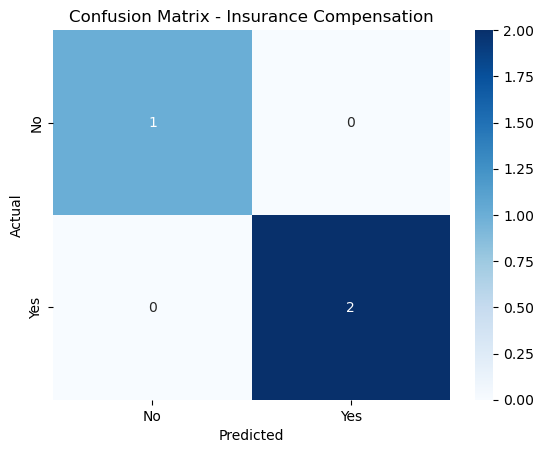

Accuracy:  1.00
Recall:    1.00
Precision: 1.00
F1 Score:  1.00
Model saved successfully!
Model loaded successfully!
Prediction for sample [45, 3, 320]: [1]


In [78]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# 1.
# Creating the dataset
age = [25, 38, 29, 47, 35, 53, 31, 42, 40, 50]
claims = [0, 2, 1, 3, 1, 4, 0, 2, 2, 3]
insurance_amount = [120, 200, 150, 300, 220, 400, 130, 180, 250, 350]

# Target: compensation (1 = Yes, 0 = No)
compensation = [0, 1, 0, 1, 1, 1, 0, 1, 1, 1]

# Combine features into a single array
X = np.column_stack((age, claims, insurance_amount))
y = np.array(compensation)


# 2.
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


#3.
rf_model = RandomForestClassifier(
    n_estimators=100,   
    bootstrap=True,     
    oob_score=True,     
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)


#4.
# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate model accuracy scores
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


# 5.
# Calculate OOB accuracy scores
print(f"Out-of-Bag Accuracy: {rf_model.oob_score_:.2f}")


# 6.
# Calculate and print evaluation metrics

# classification report
print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    labels=[0, 1],
    target_names=["No Compensation", "Compensation"],
    zero_division=0
))

# Confusion matrix (visual)
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Insurance Compensation")
plt.show()

# calculation of individual metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division=0)
precision = precision_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score:  {f1:.2f}")


# 7.
# The difference between regular accuracy and OOB Accuracy - 
# Regular accuracy is calculated on the test set that I kept aside, 
# while OOB Accuracy is an internal accuracy that the model computes by itself on samples it did not use during training


# 8.
# Save the Random Forest model to disk
joblib.dump(rf_model, "rf_insurance_model.joblib")
print("Model saved successfully!")

# Load the model back from disk
loaded_model = joblib.load("rf_insurance_model.joblib")
print("Model loaded successfully!")

# Make a prediction with the loaded model
sample = [[45, 3, 320]]  # age=45, claims=3, insurance=320
prediction = loaded_model.predict(sample)
print("Prediction for sample [45, 3, 320]:", prediction)